In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('cleaned_movies.csv')


# Simple Resampling - Random Oversampling

In [3]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['genres', 'original_language', 'popularity_class', 'popularity']).copy()
y = df['popularity_class']

# should we add differt binding for oversampling?
# in this type of resampling we need numeric feature I added the mean value, but maybe for different algorithm just adding nr index instead of for example genres will be better?

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([X_resampled.reset_index(drop=True),
                          pd.Series(y_resampled, name='popularity_class')], axis=1)

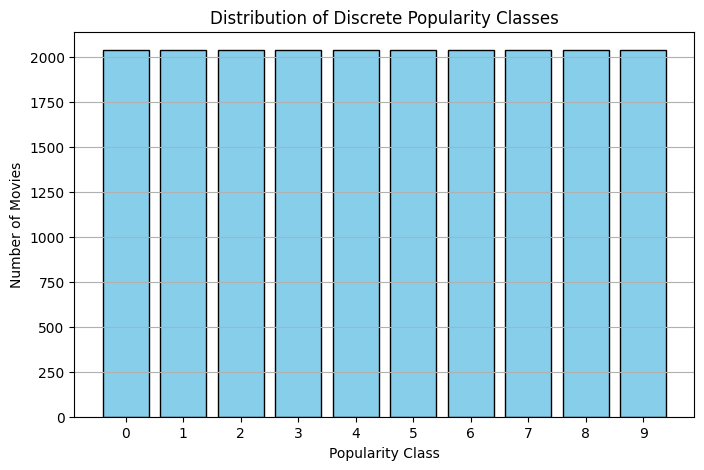

In [4]:
import matplotlib.pyplot as plt

class_counts = df_resampled['popularity_class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Discrete Popularity Classes')
plt.xlabel('Popularity Class')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.savefig('histogram_popularity_simply_resampling_discrete.png')
plt.show()  

In [5]:
X = df_resampled.drop(columns=['popularity_class']).copy()
y = df_resampled['popularity_class']

print(X.dtypes)

budget            int64
runtime         float64
vote_average    float64
vote_count        int64
revenue           int64
release_year      int64
genres_score    float64
dtype: object


# SVM

In [6]:
from sklearn.svm import SVC

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])


kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")


Fold 1 - Acc: 0.6606 | Prec: 0.6661 | Rec: 0.6590 | F1: 0.6609
Fold 2 - Acc: 0.6670 | Prec: 0.6759 | Rec: 0.6662 | F1: 0.6696
Fold 3 - Acc: 0.6626 | Prec: 0.6712 | Rec: 0.6650 | F1: 0.6663
Fold 4 - Acc: 0.6532 | Prec: 0.6630 | Rec: 0.6535 | F1: 0.6561
Fold 5 - Acc: 0.6601 | Prec: 0.6753 | Rec: 0.6643 | F1: 0.6672
Fold 6 - Acc: 0.6616 | Prec: 0.6653 | Rec: 0.6627 | F1: 0.6591
Fold 7 - Acc: 0.6596 | Prec: 0.6658 | Rec: 0.6614 | F1: 0.6609
Fold 8 - Acc: 0.6562 | Prec: 0.6605 | Rec: 0.6561 | F1: 0.6564
Fold 9 - Acc: 0.6739 | Prec: 0.6738 | Rec: 0.6701 | F1: 0.6697
Fold 10 - Acc: 0.6783 | Prec: 0.6848 | Rec: 0.6763 | F1: 0.6784

--- Summary ---
Mean Accuracy: 0.6633
Mean Precision: 0.6702
Mean Recall: 0.6635
Mean F1-score: 0.6645


In [7]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_SVC.csv", index=False)

# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])


kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.8983 | Prec: 0.9007 | Rec: 0.9001 | F1: 0.8999
Fold 2 - Acc: 0.8846 | Prec: 0.8808 | Rec: 0.8838 | F1: 0.8812
Fold 3 - Acc: 0.9003 | Prec: 0.8982 | Rec: 0.8992 | F1: 0.8983
Fold 4 - Acc: 0.8988 | Prec: 0.8973 | Rec: 0.9006 | F1: 0.8987
Fold 5 - Acc: 0.8993 | Prec: 0.8976 | Rec: 0.8996 | F1: 0.8983
Fold 6 - Acc: 0.9077 | Prec: 0.9002 | Rec: 0.9023 | F1: 0.9010
Fold 7 - Acc: 0.8939 | Prec: 0.8932 | Rec: 0.8979 | F1: 0.8949
Fold 8 - Acc: 0.8944 | Prec: 0.8919 | Rec: 0.8937 | F1: 0.8926
Fold 9 - Acc: 0.8993 | Prec: 0.8954 | Rec: 0.8967 | F1: 0.8953
Fold 10 - Acc: 0.9126 | Prec: 0.9142 | Rec: 0.9149 | F1: 0.9144

--- Summary ---
Mean Accuracy: 0.8989
Mean Precision: 0.8969
Mean Recall: 0.8989
Mean F1-score: 0.8974


In [9]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_KNN.csv", index=False)

# DECISION TREE

In [10]:
from sklearn.tree import DecisionTreeClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('tree', DecisionTreeClassifier(random_state=42))
])

kf = KFold(n_splits=10, shuffle=True, random_state=42)


# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.9764 | Prec: 0.9775 | Rec: 0.9769 | F1: 0.9769
Fold 2 - Acc: 0.9794 | Prec: 0.9791 | Rec: 0.9790 | F1: 0.9790
Fold 3 - Acc: 0.9754 | Prec: 0.9753 | Rec: 0.9745 | F1: 0.9745
Fold 4 - Acc: 0.9764 | Prec: 0.9778 | Rec: 0.9769 | F1: 0.9770
Fold 5 - Acc: 0.9818 | Prec: 0.9823 | Rec: 0.9813 | F1: 0.9814
Fold 6 - Acc: 0.9853 | Prec: 0.9844 | Rec: 0.9845 | F1: 0.9844
Fold 7 - Acc: 0.9686 | Prec: 0.9692 | Rec: 0.9701 | F1: 0.9694
Fold 8 - Acc: 0.9779 | Prec: 0.9778 | Rec: 0.9777 | F1: 0.9776
Fold 9 - Acc: 0.9794 | Prec: 0.9801 | Rec: 0.9790 | F1: 0.9791
Fold 10 - Acc: 0.9779 | Prec: 0.9786 | Rec: 0.9785 | F1: 0.9785

--- Summary ---
Mean Accuracy: 0.9778
Mean Precision: 0.9782
Mean Recall: 0.9778
Mean F1-score: 0.9778


In [11]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_DT.csv", index=False)

# MULTILAYER PERCEPTRON (MLP)

In [12]:
from sklearn.neural_network import MLPClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),     # two hidden layers: 100 and 50 neurons
    activation='relu',                # a commonly used activation function
    solver='adam',                    # modern optimizer, better than 'sgd' in most cases
    learning_rate_init=0.001,         # lower learning rate improves stability
    max_iter=1000,                    # more iterations to allow convergence
    early_stopping=True,              # stops training if validation score doesn't improve
    random_state=42                   # ensures reproducibility
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])


kf = KFold(n_splits=10, shuffle=True, random_state=42)


# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.8639 | Prec: 0.8662 | Rec: 0.8662 | F1: 0.8655
Fold 2 - Acc: 0.8757 | Prec: 0.8729 | Rec: 0.8733 | F1: 0.8723
Fold 3 - Acc: 0.8689 | Prec: 0.8708 | Rec: 0.8727 | F1: 0.8707
Fold 4 - Acc: 0.8644 | Prec: 0.8631 | Rec: 0.8663 | F1: 0.8621
Fold 5 - Acc: 0.8713 | Prec: 0.8744 | Rec: 0.8734 | F1: 0.8733
Fold 6 - Acc: 0.8969 | Prec: 0.8930 | Rec: 0.8923 | F1: 0.8918
Fold 7 - Acc: 0.8713 | Prec: 0.8707 | Rec: 0.8739 | F1: 0.8719
Fold 8 - Acc: 0.8797 | Prec: 0.8787 | Rec: 0.8800 | F1: 0.8776
Fold 9 - Acc: 0.8969 | Prec: 0.8896 | Rec: 0.8908 | F1: 0.8896
Fold 10 - Acc: 0.8969 | Prec: 0.8985 | Rec: 0.8979 | F1: 0.8976

--- Summary ---
Mean Accuracy: 0.8786
Mean Precision: 0.8778
Mean Recall: 0.8787
Mean F1-score: 0.8773


In [13]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_MLP.csv", index=False)